In [4]:
!python3 -m pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 8.6 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 5.5 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load and Explore Data
data = pd.read_csv('featured_data.csv')  # Replace with your dataset's file name
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kc                       5844 non-null   float64
 1   ETo (mm/day)             5844 non-null   float64
 2   Temp Min (°C)            5844 non-null   float64
 3   Temp Max (°C)            5844 non-null   float64
 4   Humidity (%)             5844 non-null   float64
 5   Rainfall (mm)            5844 non-null   float64
 6   Wind Speed (m/s)         5844 non-null   float64
 7   Solar Radiation (MJ/m²)  5844 non-null   float64
 8   ETc (mm/day)             5844 non-null   float64
 9   DAS                      5844 non-null   int64  
 10  Growth_Phase             5844 non-null   object 
 11  Temp_Range               5844 non-null   float64
 12  DayOfYear_sin            5844 non-null   float64
 13  DayOfYear_cos            5844 non-null   float64
 14  Is_Raining              

In [4]:
# # Step 3: Feature Encoding for Categorical Variables
# # Check unique values in Growth_Phase
# print(data['Growth_Phase'].unique())

# # Convert Growth_Phase to numeric using one-hot encoding
# data = pd.get_dummies(data, columns=["Growth_Phase"], drop_first=True)

In [5]:
# Step 3: Feature Encoding for Categorical Variables
data = pd.get_dummies(data, columns=["Growth_Phase"], drop_first=True)


In [6]:
# Step 4: Feature Engineering and Scaling
# Select features for scaling
features_to_scale = ['Kc', 'ETo (mm/day)', 'Temp Min (°C)', 'Temp Max (°C)',
                     'Humidity (%)', 'Rainfall (mm)', 'Wind Speed (m/s)',
                     'Solar Radiation (MJ/m²)', 'Temp_Range']

scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [7]:
# Step 5: Split Data into Training and Testing Sets
# Define features (X) and target (y)
X = data.drop(columns=['ETc (mm/day)'])
y = data['ETc (mm/day)']


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 6: Train the Linear Model
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Step 7: Evaluate the Model
# Predict using the testing set
y_pred = model.predict(X_test)

In [11]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.030188081638870132
R² Score: 0.980050315854814


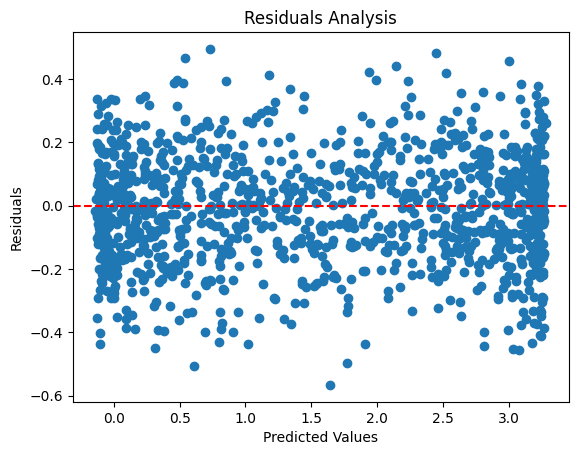

In [12]:
# Step 8: Analyze Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Analysis")
plt.show()


In [13]:
# Step 9: Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                      Feature  Coefficient
10              DayOfYear_sin     1.761518
2               Temp Min (°C)     0.043298
5               Rainfall (mm)     0.042849
3               Temp Max (°C)     0.032607
4                Humidity (%)     0.012248
15    Growth_Phase_Vegetative     0.008630
14       Growth_Phase_Seeding     0.007492
9                  Temp_Range     0.006036
11              DayOfYear_cos     0.003887
8                         DAS     0.000002
12                 Is_Raining    -0.010158
13  Growth_Phase_Reproductive    -0.015366
0                          Kc    -0.027397
6            Wind Speed (m/s)    -0.035172
1                ETo (mm/day)    -0.053312
7     Solar Radiation (MJ/m²)    -0.192221


In [16]:
print(features_used_in_training)

['Kc', 'ETo (mm/day)', 'Temp Min (°C)', 'Temp Max (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Wind Speed (m/s)', 'Solar Radiation (MJ/m²)', 'DAS', 'Temp_Range', 'DayOfYear_sin', 'DayOfYear_cos', 'Is_Raining', 'Growth_Phase_Reproductive', 'Growth_Phase_Seeding', 'Growth_Phase_Vegetative']


In [81]:
# Define features used during training
features_used_in_training = list(X_train.columns)

# Example user input values
user_input = {
    'Kc': 0.4,  # Example value
    'ETo (mm/day)': 5.51,
    'Temp Min (°C)': 10,
    'Temp Max (°C)': 45,
    'Humidity (%)': 60,
    'Rainfall (mm)': 3,
    'Wind Speed (m/s)': 2,
    'Solar Radiation (MJ/m²)': 20,
    'Temp_Range': 15,
    'DAS': 50,
    'DayOfYear_sin': 0.5,
    'DayOfYear_cos': 0.86,
    'Is_Raining': 0,  # Adjust based on user selection
    "Growth_Phase_Reproductive": 0,
    "Growth_Phase_Seeding": 0,
    "Growth_Phase_Vegetative": 1
}

# Add missing features with default values
for feature in features_used_in_training:
    if feature not in user_input:
        user_input[feature] = 0


In [82]:
features_used_in_training = X_train.columns
print(features_used_in_training)

Index(['Kc', 'ETo (mm/day)', 'Temp Min (°C)', 'Temp Max (°C)', 'Humidity (%)',
       'Rainfall (mm)', 'Wind Speed (m/s)', 'Solar Radiation (MJ/m²)', 'DAS',
       'Temp_Range', 'DayOfYear_sin', 'DayOfYear_cos', 'Is_Raining',
       'Growth_Phase_Reproductive', 'Growth_Phase_Seeding',
       'Growth_Phase_Vegetative'],
      dtype='object')


In [83]:
# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Reorder user DataFrame to match training feature order
user_df = user_df[features_used_in_training]

# Apply feature scaling to scaled features
user_df[features_to_scale] = scaler.transform(user_df[features_to_scale])

In [85]:
# Make prediction
etc_prediction = model.predict(user_df)
print(f"Predicted ETc (mm/day): {etc_prediction[0]}")

Predicted ETc (mm/day): 2.4546284003418277


In [86]:
!python -m pip install joblib

In [87]:
import joblib

# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']